In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parameters of the model
kappa = 0.1
alpha = 0.2
B1 = 0.4
b2 = 0.4
b3 = 0.4
A1 = 0.1
k1 = 0.5
g1 = 0.2
g3 = 0.2
U0 = 2.0

beta = 0.7
a3 = 0.55

D_C1 = 10**(-4)
D_M1 = 10**(-4)

In [3]:
#Initial conditions
U_0 = 2.0
I_0 = 0.0
M1_0 = 0.5
C1_0 = 0.08

In [4]:
#space partitioning
M = 4000 
L  = 4
h = L/M  #space step
#time
t = 1000

x = np.linspace(0, L, M+1)

In [5]:
#for accuracy
Q = np.zeros(10)
Step = np.zeros(10)

In [6]:
#number of points & steps
N1 = 1000
N2 = 2000

In [7]:
# a - lower diag, b - main diag, c - upper diag, d - sol

def Thomas_Method(a, b, c, d):
    n = len(a)
    res = np.zeros(n)

    w = np.zeros(n - 1)
    g = np.zeros(n)

    w[0] = c[0]/b[0] # c'_1
    g[0] = d[0]/b[0] # d'_1

    for i in range(1, n - 1):
        w[i] = c[i] / (b[i] - a[i] * w[i - 1])
        g[i] = (d[i] - a[i]* g[i - 1]) / (b[i] - \
                                                      a[i] * w[i - 1])

    g[n - 1] = (d[n - 1] - a[n - 1]* g[n - 2]) / (b[n - 1] - \
                                                     a[n - 1] * w[n - 2])
    res[n - 1] = g[n - 1]
    for i in range(n - 2, -1, -1 ):
        res[i] = g[i] - w[i] * res[i + 1]
    return res

In [8]:
for n in range (0,10):
    #number of points & steps
    tau1 = t/N1
    tau2 = t/N2
    T1 = np.linspace(0, t, N1+1)
    T2 = np.linspace(0, t, N2+1)
    #arrays
    U1 = np.zeros([N1+1, M+1])
    I1 = np.zeros([N1+1, M+1])
    C1 = np.zeros([N1+1, M+1])
    M1 = np.zeros([N1+1, M+1])
    U2 = np.zeros([N2+1, M+1])
    I2 = np.zeros([N2+1, M+1])
    C2 = np.zeros([N2+1, M+1])
    M2 = np.zeros([N2+1, M+1])
    #initial
    U1[0,:] = U_0
    I1[0,:] = I_0
    M1[0] = np.ones(M + 1) * M1_0
    M1[0, 401::] = 0
    C1[0] = np.ones(M + 1) * C1_0
    C1[0, 401::] = 0
    
    U2[0,:] = U_0
    I2[0,:] = I_0
    M2[0] = np.ones(M + 1) * M1_0
    M2[0, 401::] = 0
    C2[0] = np.ones(M + 1) * C1_0
    C2[0, 401::] = 0
    
    s1 = (D_C1*tau1)/(h**2)
    s2 = (D_M1*tau1)/(h**2)
    #calculations
    for i in range(1, N1+1):
        a = np.zeros(M+1)
        b = np.zeros(M+1)
        c = np.zeros(M+1)
        d = np.zeros(M+1)
        a[0] = 0
        a[1:M+1] = -s1
        b[0] = 1 +s1
        b[1:M] = 1 + 2*s1
        b[M] = 1+s1
        c[0:M] = -s1
        c[M] = 0
        d[0:M+1] = (tau1*A1*C1[i-1,0:M+1]*M1[i-1,0:M+1])/(1+b2*C1[i-1,0:M+1]) + tau1*k1*I1[i-1,0:M+1] + (1 -tau1*g1)*C1[i-1,0:M+1]

        a1 = np.zeros(M+1)
        b1 = np.zeros(M+1)
        c1 = np.zeros(M+1)
        d1 = np.zeros(M+1)
        a1[0] = 0
        a1[1:M+1]= -s2
        b1[0] =1 + s2
        b1[1:M] = 1 + 2*s2
        b[M] = 1+s2
        c1[0:M]=  -s2
        c1[M]= 0
        d1[0:M+1] = (tau1*a3*C1[i-1,0:M+1])/(1+b3*C1[i-1,0:M+1])  + (1 - tau1*g3)*M1[i-1,0:M+1]

        C1[i] = Thomas_Method(a, b, c, d)
        M1[i] = Thomas_Method(a1, b1, c1, d1)
        U1[i]=kappa*tau1*U_0 + (1-kappa*tau1)*U1[i-1]-tau1*(alpha*U1[i-1]*C1[i-1])/(1+B1*C1[i-1])
        I1[i]=tau1*(alpha*U1[i-1]*C1[i-1])/(1+B1*C1[i-1]) + (1-beta*tau1)*I1[i-1]
        
    s1 = (D_C1*tau2)/(h**2)
    s2 = (D_M1*tau2)/(h**2)
    for i in range(1, N2+1):
        a = np.zeros(M+1)
        b = np.zeros(M+1)
        c = np.zeros(M+1)
        d = np.zeros(M+1)
        a[0] = 0
        a[1:M+1] = -s1
        b[0] = 1 +s1
        b[1:M] = 1 + 2*s1
        b[M] = 1+s1
        c[0:M] = -s1
        c[M] = 0
        d[0:M+1] = (tau2*A1*C2[i-1,0:M+1]*M2[i-1,0:M+1])/(1+b2*C2[i-1,0:M+1]) + tau2*k1*I2[i-1,0:M+1] + (1 -tau2*g1)*C2[i-1,0:M+1]

        a1 = np.zeros(M+1)
        b1 = np.zeros(M+1)
        c1 = np.zeros(M+1)
        d1 = np.zeros(M+1)
        a1[0] = 0
        a1[1:M+1]= -s2
        b1[0] =1 + s2
        b1[1:M] = 1 + 2*s2
        b[M] = 1+s2
        c1[0:M]=  -s2
        c1[M]= 0
        d1[0:M+1] = (tau2*a3*C2[i-1,0:M+1])/(1+b3*C2[i-1,0:M+1])  + (1 - tau2*g3)*M2[i-1,0:M+1]

        C2[i] = Thomas_Method(a, b, c, d)
        M2[i] = Thomas_Method(a1, b1, c1, d1)
        U2[i]=kappa*tau2*U_0 + (1-kappa*tau2)*U2[i-1]-tau2*(alpha*U2[i-1]*C2[i-1])/(1+B1*C2[i-1])
        I2[i]=tau2*(alpha*U2[i-1]*C2[i-1])/(1+B1*C2[i-1]) + (1-beta*tau2)*I2[i-1]
    
    #accuracy
    Abs = np.zeros([t, M+1])
    e1 = int(N1/t)
    e2 = int(N2/t)
    for k in range (0,t):
        for j in range (0, M+1):
            Abs[k, j] = (abs(U1[e1*k, j] - U2[e2*k, j]))/U1[e1*k, j]
    Abs[np.isnan(Abs)] = 0
    Abs[Abs == np.inf] = 0
    Q[n] = np.amax(Abs)
    Step[n] = t/N2
    #next
    N1+=1000
    N2+=1000

In [9]:
N1

11000

In [10]:
len(Abs)

1000

In [11]:
Q

array([0.01945209, 0.0061381 , 0.00299438, 0.00177172, 0.00117075,
       0.00083121, 0.00062079, 0.0004814 , 0.0003843 , 0.00031396])

In [13]:
Step

array([0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
       0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909])

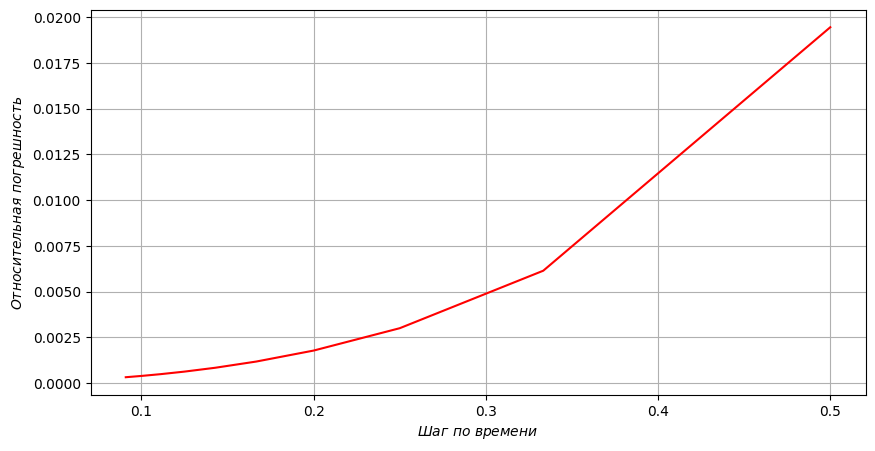

In [12]:
plt.figure(figsize=(10,5))
#plt.title("Dependence of C1 on beta with a3 = 0.2")

plt.plot(Step, Q, c = 'red')


plt.xlabel('$Шаг$ $по$ $времени$')
plt.ylabel('$Относительная$ $погрешность$')

plt.grid()
plt.show()

In [177]:
Step1 = np.zeros(10)
Step1[0] = 2000
for i in range (1,10):
    Step1[i] = Step1[i-1] + 1000
    

In [178]:
Step1

array([ 2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,  9000.,
       10000., 11000.])

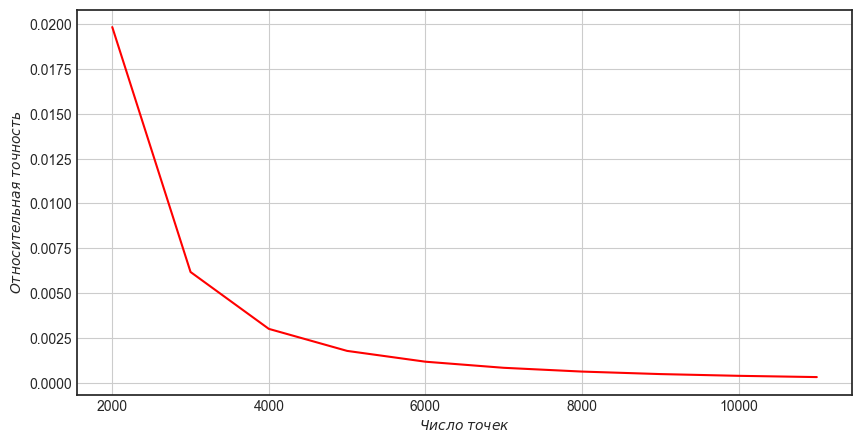

In [180]:
plt.figure(figsize=(10,5))

plt.plot(Step1, Q, c = 'red')


plt.xlabel('$Число$ $точек$')
plt.ylabel('$Относительная$ $точность$')

plt.grid()
plt.show()